In [1]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import matplotlib.pylab as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

# NNT
Data -> Humans' Effort(SIFT,HOG,..) -> **MachineTraining(SVM,KNN,..)** -> Output\
Data -> **Neural Network(Deep Learning)** -> Output\

Deep Learning need _training data_ , _test data_

## Standard index
### lose function(cost function)
MSE (Mean Squared Error)

$
E = \displaystyle\frac{1}{2}\sum_{k}(y_k-t_k)^2
$

$y_k$ Output of NN\
$t_k$ Answer label\
$k$ Dimension of Data

In [2]:
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [3]:
# If num 
# t: answer is `2`
t = [0,0,1,0,0,0,0,0]
# y: estimate `2` is answer (0.6)
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t)))

# y: estimate `7` is answer (0.6)
y = [0.1,0.05,0.1,0.0,0.05,0.6,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t)))

0.09250000000000003
0.5925


CEE (Cross Entropy Error)

$
E = -\displaystyle\sum_{k}t_k\log{y_k}
$

$y_k$ Output of NN\
$t_k$ Answer label (One-hot encoding)\
$k$ Dimension of Data

In [4]:
def cross_entropy_error(y,t):
    # use delta cause log0 = -inf
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [5]:
# t: answer is `2`
t = [0,0,1,0,0,0,0,0]
# y: estimate `2` is answer (0.6)
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

# y: estimate `7` is answer (0.6)
y = [0.1,0.05,0.1,0.0,0.05,0.6,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

0.510825457099338
2.302584092994546


### Minibatch Learning

Due to ineffciency in checking all lost functions, it's recommended to randomly choose some ipt data, and  calculate lose functions of them.

$
E = \displaystyle-\frac{1}{N}\sum_{n}\sum_{k}t_{nk}\log{y_{nk}}
$



In [6]:
(x_train,t_train), (x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size) # 0<{NUM}<train_size, len({NUM})=batch_size
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [7]:
# CEE (for batch)
def cross_entropy_errorB(y,t):
    # y: NN opt, t: one-hot-label
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

In [8]:
# batch CEE when t isn't one-hot-encoded
def cross_entropy_errorB_nonOneHot(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

In [9]:
testTemp = np.arange(0,20)
# testTemp.ndim == 1
testTemp = testTemp.reshape(2,10)
testTemp.ndim

2

### Calculus

reason why we use lost functions is to fit error with calculus.\
when we use formal stair-shape function, slope will be either 0 or inf.

In [10]:
def numerical_diff(f,x):
    h = 1e-4 # known to fit well
    return (f(x+h)-f(x-h))/(2*h)

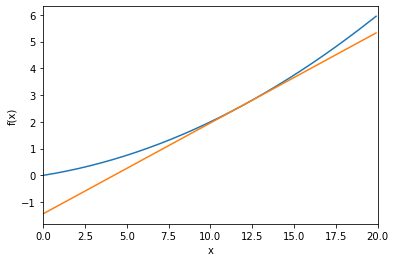

In [11]:
def fn_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0,20.0,0.1)
y = fn_1(x)

plt.xlim(0,20)
plt.xlabel("x"); plt.ylabel("f(x)")
plt.plot(x,y)
plt.plot(x,numerical_diff(fn_1,12)*(x-12)+fn_1(12)) 
plt.show()

**Gradient**

$
\displaystyle(\frac{\partial{f}}{x_0},\frac{\partial{f}}{x_1},\dots)
$

In [12]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

In [13]:
x = np.array([2,4])
np.sum(x**2)

20

In [14]:
def numerical_gradient_base(f,x):
    h = 1e-4
    grad = np.zeros_like(x) # has same shape as x
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val+h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1-fxh2) / (2*h)
        x[idx] = tmp_val # restore value
    return grad

def numerical_gradient(f,x):
    if x.ndim == 1:
        return numerical_gradient_base(f,x)
    else:
        grad = np.zeros_like(x)
        
        for idx, val in enumerate(x):
            grad[idx] = numerical_gradient_base(f,val)
        return grad   

In [15]:
# function_2 = x^2 + y^2
numerical_gradient(function_2,np.array([3.,4.]))

array([6., 8.])

In [16]:
f = function_2
x = np.array([3.,4.])

h = 1e-4
grad = np.zeros_like(x)
i = 1

tmp_val = x[i]
x[i] = tmp_val+h
fxh1 = f(x)
x[i] = tmp_val-h
fxh2 = f(x)
grad[i] = (fxh1-fxh2) / (2*h)
grad

array([0., 8.])

No handles with labels found to put in legend.


2


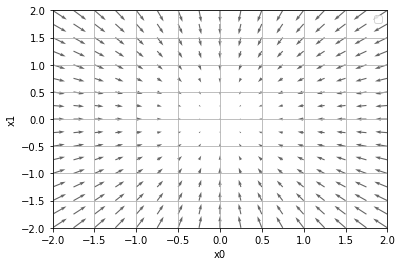

In [17]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)


X = X.flatten()
Y = Y.flatten()

print(np.array([X,Y]).ndim)
   
grad = numerical_gradient(function_2, np.array([X, Y]) )
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

## Gradient descend

follow gradient direction where slop decreasing to found saddle point(slope is 0).\
algorithm to find minimum point.

$
\displaystyle
x_0 = x_0 - \eta\frac{\partial f}{\partial x_0}\\
\displaystyle
x_1 = x_1 - \eta\frac{\partial f}{\partial x_1}
$

$\eta$ means quantity that renew.\
In NNL, also called **_learning rate_** 

In [18]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x

#### Q. found minimum val of $f(x_0,x_1)=x_0^2+x_1^2$

In [19]:
def fn2(x):
    return x[0]**2+x[1]**2

In [20]:
gradient_descent(fn2,np.array([3.,4.]),lr=0.1,step_num=100)

array([6.11110793e-10, 8.14814391e-10])

In [21]:
def gradient_descent_history(f,init_x,lr=0.01,step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x, np.array(x_history)

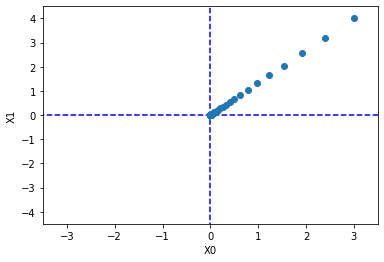

In [22]:
x,x_history = gradient_descent_history(fn2,np.array([3.,4.]),lr=0.1,step_num=100)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

Text(0.5, 1.0, 'Simplest default with labels')

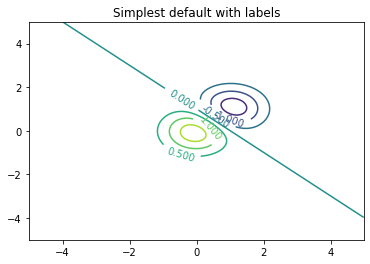

In [25]:
delta = 0.025
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

Text(0.5, 1.0, 'Simplest default with labels')

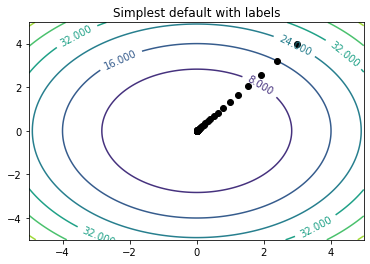

In [30]:
delta = 0.025
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = X**2+Y**2

m,m_history = gradient_descent_history(fn2,np.array([3.,4.]),lr=0.1,step_num=100)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.plot(x_history[:,0], x_history[:,1], 'ok')
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')